<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки." data-toc-modified-id="Исследование-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследование концентрации металлов (Au, Ag, Pb) на различных этапах очистки.</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках:" data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках:</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях" data-toc-modified-id="Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации всех веществ на разных стадиях</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Построение-модели" data-toc-modified-id="Построение-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение модели</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE:" data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE:</a></span></li><li><span><a href="#Обучение-и-выбор-лучшей-модели" data-toc-modified-id="Обучение-и-выбор-лучшей-модели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение и выбор лучшей модели</a></span></li><li><span><a href="#Проверка-на-тестовой-выборке" data-toc-modified-id="Проверка-на-тестовой-выборке-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка на тестовой выборке</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></ul></div>

# Восстановление золота из руды

**Цель проекта**: подготовка прототипа модели машинного обучения для компании, которая разрабатывает решения для эффективной работы промышленных предприятий. Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды в черновом и финальном концентратах. 

Технологичский процесс состоит из флотации (обогащения) и двухэтапной очистки, после каждого этапа получается концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.

В нашем распоряжении данные с параметрами добычи и очистки следующего формата: [этап].[тип_параметра].[название_параметра]

Возможные значения для блока [этап]:
- *rougher* — флотация
- *primary_cleaner* — первичная очистка
- *secondary_cleaner* — вторичная очистка
- *final* — финальные характеристики

Возможные значения для блока [тип_параметра]:
- *input* — параметры сырья
- *output* — параметры продукта
- *state* — параметры, характеризующие текущее состояние этапа
- *calculation* — расчётные характеристики

Параметры этапов:
- *air amount* — объём воздуха
- *fluid levels* — уровень жидкости
- *feed size* — размер гранул сырья
- *feed rate* — скорость подачи

В качестве метрики качества для оценки моделей будет использоваться **Symmetric Mean Absolute Percentage Error (sMAPE)**.

## Подготовка данных

### Изучение данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import mean_absolute_error
from scipy import stats as st
from scipy.stats import ks_2samp
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
train = pd.read_csv('/gold_recovery_train_new.csv')
test = pd.read_csv('/gold_recovery_test_new.csv')
full = pd.read_csv('/gold_recovery_full_new.csv')

In [4]:
display(full.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

Нам предоставлены готовые тренировочная и тестовая выборки в соотношении 73/27 и полный набор данных, из которого они сформированы.
В таблицах с полными и обучающими данными по 87 столбцов, с тестовыми данными - 53 стобца, в каждом наборе присутствуют пропуски в некоторых столбцах, однако их не очень много.  

Проверим на примере обучающей выборки, что эффективность обогащения после этапа флотации (`rougher.output.recovery`) рассчитана правильно:

In [8]:
train['recovery_check'] = (train['rougher.output.concentrate_au'] * (train['rougher.input.feed_au'] 
                                                                    - train['rougher.output.tail_au'])) / (
    train['rougher.input.feed_au'] * (train['rougher.output.concentrate_au'] - train['rougher.output.tail_au'])) * 100

In [9]:
display(train[['rougher.output.recovery', 'recovery_check']])

,rougher.output.recovery,recovery_check
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
...,...,...
14144,89.574376,89.574376
14145,87.724007,87.724007
14146,88.890579,88.890579
14147,89.858126,89.858126


Рассчитаем среднее абсолютное отклонение (MAE) между расчётными значениями recovery и recovery из исходных данных: 

In [10]:
print('MAE = ', mean_absolute_error(train['rougher.output.recovery'], train['recovery_check']))

MAE =  9.682896147825551e-15


MAE близка к 0, разница может быть объяснена небольшой погрешностью расчётов. **Таким образом, можно принять расчёт recovery из исходных данных как верный**. 

В тестовой выборке данные представлены не в полном объёме: 53 столбца из 87 исходных. Проанализируем, что за данные пропущены:
- данные с финальными параметрами продукта (блок столбцов `final.output.`)
- данные с параметрами продукта на каждом из этапов флотации и очистки (столбцы `output` для `rougher`, `primary_cleaner`, `secondary_cleaner`)
- блок столбцов `rougher.calculation` с расчётными характеристиками флотации

Таким образом, в тестовой выборке представлены только данные, оказывающие влияние на результат каждого этапа: параметры сырья и параметры текущего состояния этапа.

### Предобработка данных

Заполним пропуски в исходных данных ближайшими по времени значениями. Сделаем это в полной таблице, затем пересоберём тестовую и тренировочную выборки по данным без прпусков, используя в качестве индекса дату.

In [11]:
full = full.ffill()

Убедимся, что пропуски заполнены:

In [12]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19439 non-null float64
final.output.concentrate_pb                           19439 non-null float64
final.output.concentrate_sol                          19439 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19439 non-null float64
final.output.tail_pb                                  19439 non-null float64
final.output.tail_sol                                 19439 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19439 non-null float64
primary_cleaner.input.depressant             

In [13]:
# удаляем все столбцы, кроме даты в тестовой и тренировочной выборке
cols_to_remove_train = list(train.columns)
cols_to_remove_train.remove('date')

cols_to_remove_test = list(test.columns)
cols_to_remove_test.remove('date')

# добавляем обратно столбцы с целевыми и влияющими параметрами
cols_to_plus = list(test.columns)
cols_to_plus.extend(['final.output.recovery', 'rougher.output.recovery'])

In [14]:
# для тренировочной выборки
train_data = train.drop(cols_to_remove_train, axis = 1) 
train_data = pd.merge(train_data, full[cols_to_plus], on = 'date', how = 'left')
train_data = train_data.drop('date', axis = 1)
train_data.shape

(14149, 54)

In [15]:
# для тестовой выборки
test_data = test.drop(cols_to_remove_test, axis = 1) 
test_data = pd.merge(test_data, full[cols_to_plus], on = 'date', how = 'left')
test_data = test_data.drop('date', axis = 1)
test_data.shape

(5290, 54)

Проверим таблицы на наличие дубликатов:

In [16]:
full.duplicated().sum()

0

In [17]:
train.duplicated().sum()

0

In [18]:
test.duplicated().sum()

0

### Вывод

Данные проанализированы, правильность расчёта целевого признака проверена. В рамках предобработки удалены пропуски, проведена проверка на дубликаты, размер обучающей и тестовой выборки приведён к единому - 54 столбца, из них 52 влияющих параметра и 2 целевых признака. 

## Анализ данных

### Исследование концентрации металлов (Au, Ag, Pb) на различных этапах очистки.

Начнём с **золота**:

,"Содержание золота, %"
Первичная руда,8.27
Черновой концентрат,19.77
Первый этап очистки,32.12
Финальный концентрат,44.08


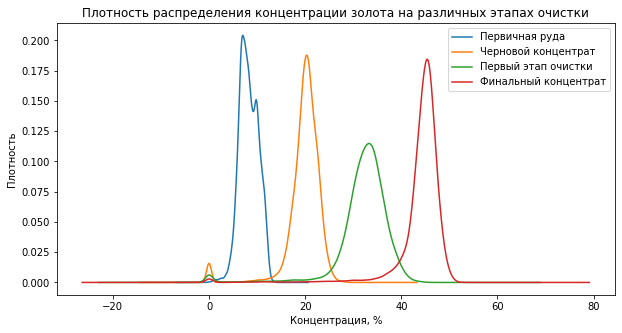

In [19]:
stages = ['Первичная руда', 'Черновой концентрат', 'Первый этап очистки', 'Финальный концентрат']
# таблица
au_percent = pd.DataFrame([full['rougher.input.feed_au'].mean(), 
                          full['rougher.output.concentrate_au'].mean(),
                          full['primary_cleaner.output.concentrate_au'].mean(),
                          full['final.output.concentrate_au'].mean()],
                         index = stages,
                         columns = ['Содержание золота, %'])
display(au_percent.round(2))

# график плотности
plt.figure(figsize=(10,5))
full['rougher.input.feed_au'].plot(kind='density')
full['rougher.output.concentrate_au'].plot(kind='density')
full['primary_cleaner.output.concentrate_au'].plot(kind='density')
full['final.output.concentrate_au'].plot(kind='density')
plt.title('Плотность распределения концентрации золота на различных этапах очистки')
plt.xlabel('Концентрация, %')
plt.ylabel('Плотность')
plt.legend(stages)
plt.show()

Динамика концентрации **серебра**:

,"Содержание серебра, %"
Первичная руда,8.79
Черновой концентрат,11.99
Первый этап очистки,8.44
Финальный концентрат,5.17


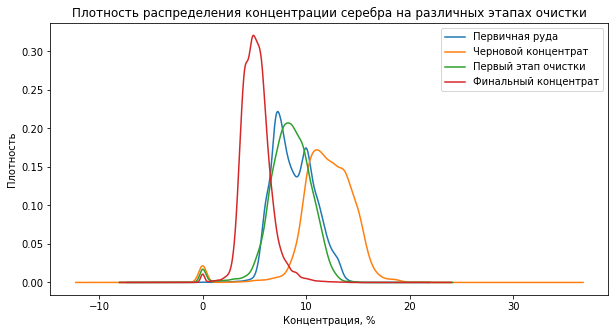

In [20]:
ag_percent = pd.DataFrame([full['rougher.input.feed_ag'].mean(), 
                          full['rougher.output.concentrate_ag'].mean(),
                          full['primary_cleaner.output.concentrate_ag'].mean(),
                          full['final.output.concentrate_ag'].mean()],
                         index = stages,
                         columns = ['Содержание серебра, %'])
display(ag_percent.round(2))

plt.figure(figsize=(10,5))
full['rougher.input.feed_ag'].plot(kind='density')
full['rougher.output.concentrate_ag'].plot(kind='density')
full['primary_cleaner.output.concentrate_ag'].plot(kind='density')
full['final.output.concentrate_ag'].plot(kind='density')
plt.title('Плотность распределения концентрации серебра на различных этапах очистки')
plt.xlabel('Концентрация, %')
plt.ylabel('Плотность')
plt.legend(stages)
plt.show()

Динамика концентрации **свинца**:

,"Содержание свинца, %"
Первичная руда,3.59
Черновой концентрат,7.61
Первый этап очистки,9.81
Финальный концентрат,9.98


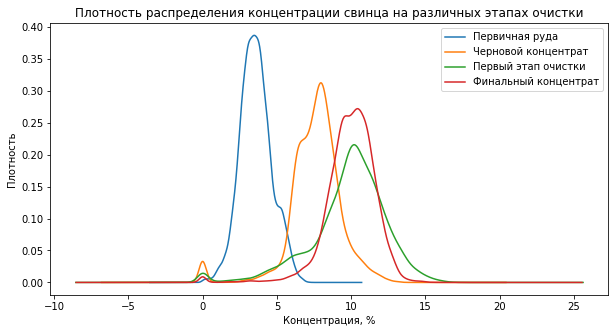

In [21]:
pb_percent = pd.DataFrame([full['rougher.input.feed_pb'].mean(), 
                          full['rougher.output.concentrate_pb'].mean(),
                          full['primary_cleaner.output.concentrate_pb'].mean(),
                          full['final.output.concentrate_pb'].mean()],
                         index = stages,
                         columns = ['Содержание свинца, %'])
display(pb_percent.round(2))

plt.figure(figsize=(10,5))
full['rougher.input.feed_pb'].plot(kind='density')
full['rougher.output.concentrate_pb'].plot(kind='density')
full['primary_cleaner.output.concentrate_pb'].plot(kind='density')
full['final.output.concentrate_pb'].plot(kind='density')
plt.title('Плотность распределения концентрации свинца на различных этапах очистки')
plt.xlabel('Концентрация, %')
plt.ylabel('Плотность')
plt.legend(stages)
plt.show()

Содержание золота в продукте переработки увеличивается с каждым этапом: с 8,3% до 44% в среднем в финальном концентрате. 

Содержание серебра увеличивается после флотации, однако снижается в последующем после обоих этапов очистки, и в финальном концентрате составляет 5,2% против 8,9% в первичной руде. Возможно, это особенность технологического процесса, поскольку в нашем случае задача состоит в максимизации содержания золота.

Содержание свинца значительно увеличивается после флотации и первого этапа очистки, после второго этапа очистки остаётся примерно на том же уровне. Финальный концентрат содержит 9,98% свинца. 
___

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках:
**На этапе флотации**:

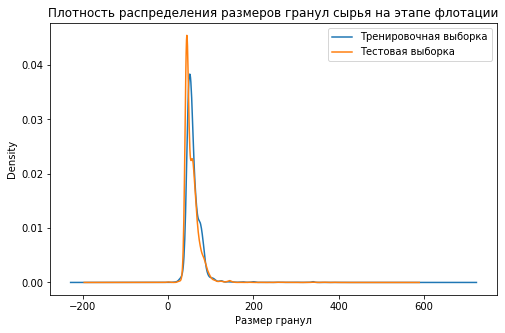

In [22]:
plt.figure(figsize=(8,5))
train_data['rougher.input.feed_size'].plot(kind='density')
test_data['rougher.input.feed_size'].plot(kind='density')
plt.title('Плотность распределения размеров гранул сырья на этапе флотации')
plt.xlabel('Размер гранул')
plt.legend(['Тренировочная выборка', 'Тестовая выборка'])
plt.show()

**На первом этапе очистки**:

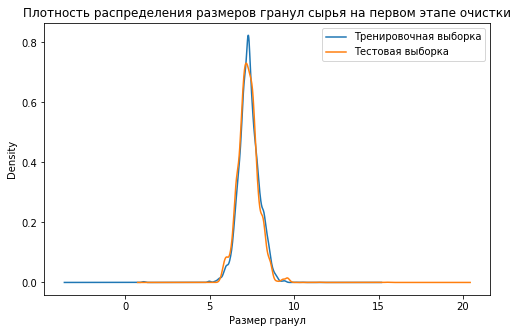

In [23]:
plt.figure(figsize=(8,5))
train_data['primary_cleaner.input.feed_size'].plot(kind='density')
test_data['primary_cleaner.input.feed_size'].plot(kind='density')
plt.title('Плотность распределения размеров гранул сырья на первом этапе очистки')
plt.xlabel('Размер гранул')
plt.legend(['Тренировочная выборка', 'Тестовая выборка'])
plt.show()

In [24]:
feed_size = pd.DataFrame([[train_data['rougher.input.feed_size'].mean(), test_data['rougher.input.feed_size'].mean()], 
                          [train_data['primary_cleaner.input.feed_size'].mean(), test_data['primary_cleaner.input.feed_size'].mean()]],
                         index = ['Этап флотации', 'Первый этап очистки'],
                         columns = ['Обучающая выборка', 'Тестовая выборка'])
feed_size.round(2)

,Обучающая выборка,Тестовая выборка
Этап флотации,60.24,55.95
Первый этап очистки,7.32,7.27


Проверим гипотезы о равенстве распределений с помощью критерия Колмогорова-Смирнова.

*Гипотеза H0*: распределения в обучающей и тестовой выборке идентичны. *Гипотеза H1*: распределения в обучающей и тестовой выборке значимо отличатся. Alpha примем равным 0.05.

In [25]:
ks_2samp(train_data['rougher.input.feed_size'], test_data['rougher.input.feed_size'])

Ks_2sampResult(statistic=0.2502993057549405, pvalue=5.936066942422686e-210)

In [26]:
ks_2samp(train_data['primary_cleaner.input.feed_size'], test_data['primary_cleaner.input.feed_size'])

Ks_2sampResult(statistic=0.05922065470904381, pvalue=3.73108187167308e-12)

In [27]:
st.mannwhitneyu(train_data['rougher.input.feed_size'], test_data['rougher.input.feed_size'])

MannwhitneyuResult(statistic=29591362.0, pvalue=2.3787583288418054e-112)

In [28]:
st.mannwhitneyu(train_data['primary_cleaner.input.feed_size'], test_data['primary_cleaner.input.feed_size'])

MannwhitneyuResult(statistic=35164961.0, pvalue=4.352958293398979e-11)

Визуально распределения размеров гранул на тестовой и тренировочной выборке идентичны. 
___

### Исследование суммарной концентрации всех веществ на разных стадиях

In [29]:
def sum_percent (data):
    data['sum_percent_rougher'] = data['rougher.input.feed_ag'] + data['rougher.input.feed_au'] + data[
    'rougher.input.feed_pb'] + data['rougher.input.feed_sol']

    # черновой концентрат
    data['sum_percent_first'] = data['rougher.output.concentrate_ag'] + data['rougher.output.concentrate_au'] + data[
    'rougher.output.concentrate_pb'] + data['rougher.output.concentrate_sol']

    # после первой очистки
    data['sum_percent_sec'] = data['primary_cleaner.output.concentrate_ag'] + data[
        'primary_cleaner.output.concentrate_au'] + data['primary_cleaner.output.concentrate_pb'] + full[
        'primary_cleaner.output.concentrate_sol']

    # финальный концентрат
    data['sum_percent_final'] = data['final.output.concentrate_ag'] + data['final.output.concentrate_au'] + data[
    'final.output.concentrate_pb'] + data['final.output.concentrate_sol']
    return data

sum_percent(full)
full[['sum_percent_rougher', 'sum_percent_first', 'sum_percent_sec', 'sum_percent_final']].describe()

,sum_percent_rougher,sum_percent_first,sum_percent_sec,sum_percent_final
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,57.320789,68.170865,60.764731,68.653624
std,7.212680,12.491279,10.017271,7.427536
min,0.040000,0.000000,0.000000,0.000000
25%,53.557679,66.012495,58.929364,67.932362
50%,57.594391,70.181495,62.497674,69.598444
75%,61.953459,74.356904,65.667336,71.368472
max,76.978947,88.140119,80.749343,80.210644


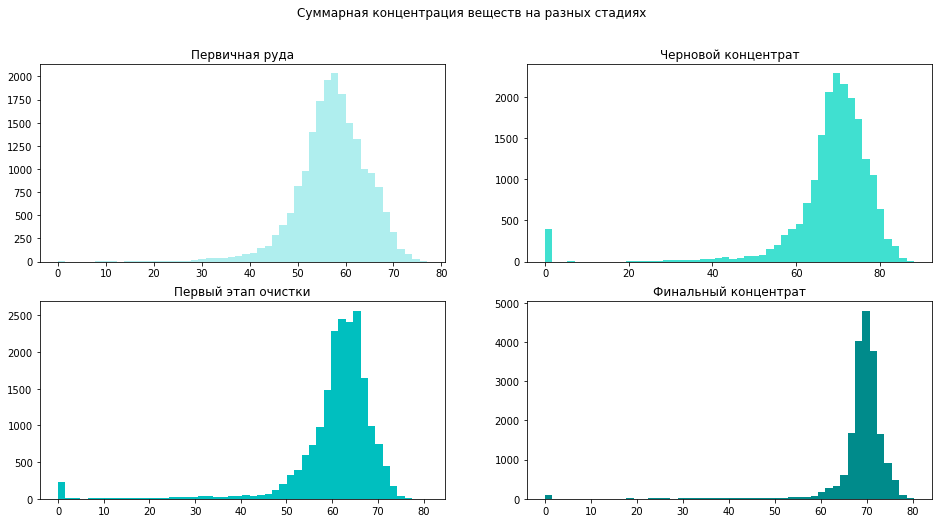

In [30]:
fig, axs = plt.subplots(2, 2, figsize = (16, 8))
axs[0, 0].hist(full['sum_percent_rougher'], bins = 50, color='paleturquoise')
axs[0, 0].set_title('Первичная руда')

axs[0, 1].hist(full['sum_percent_first'], bins = 50, color = 'turquoise')
axs[0, 1].set_title('Черновой концентрат')

axs[1, 0].hist(full['sum_percent_sec'], bins = 50, color = 'c')
axs[1, 0].set_title('Первый этап очистки')

axs[1, 1].hist(full['sum_percent_final'], bins = 50, color = 'darkcyan')
axs[1, 1].set_title('Финальный концентрат')
fig.suptitle('Суммарная концентрация веществ на разных стадиях')
plt.show()

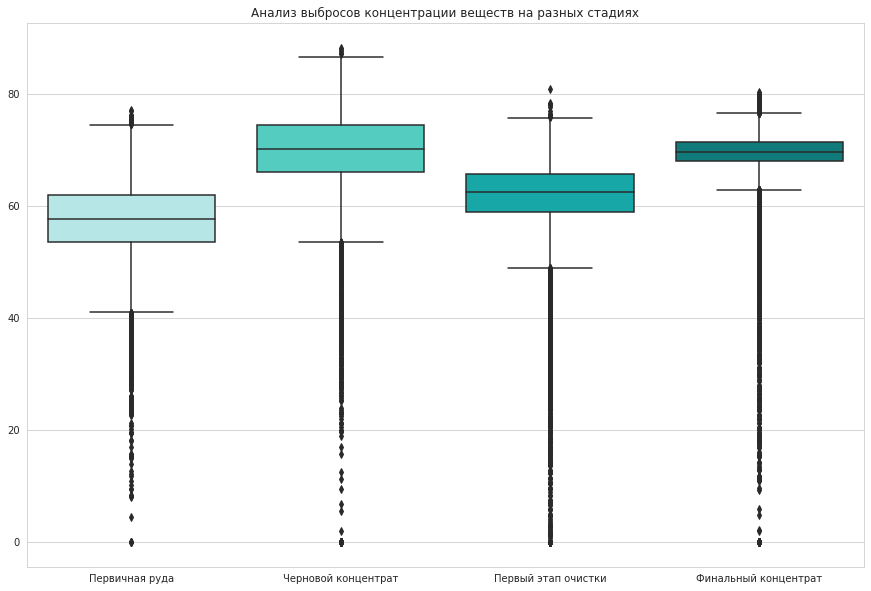

In [31]:
plt.figure(figsize = (15,10))
sns.set_style('whitegrid')
data = [full['sum_percent_rougher'], full['sum_percent_first'], full['sum_percent_sec'], full['sum_percent_final']]
lbl = ['Первичная руда', 'Черновой концентрат', 'Первый этап очистки', 'Финальный концентрат']
colors = ['paleturquoise', 'turquoise', 'c', 'darkcyan']
sns.boxplot(x = lbl, y = data, palette = colors)
plt.title('Анализ выбросов концентрации веществ на разных стадиях')
plt.show()

Распределения на каждой стадии ассиметричны, с длинными хвостами в области низких значений и, соответственно, большим количеством выбросов ниже 5% квантиля. На каждом этапе встречаются партии с нулевой концентрацией веществ, что маловерятно в реальных условиях. Посмотрим на эти данные подробнее:

In [32]:
full.query('sum_percent_first == 0')[['sum_percent_rougher', 'sum_percent_first', 
                                      'sum_percent_sec', 'sum_percent_final']]

,sum_percent_rougher,sum_percent_first,sum_percent_sec,sum_percent_final
45,58.602038,0.0,74.992510,66.175996
46,59.921613,0.0,75.187102,66.794250
47,57.269041,0.0,75.513787,67.572604
48,25.352358,0.0,75.491415,65.598903
49,40.721375,0.0,71.837866,63.445359
...,...,...,...,...
15620,58.106496,0.0,68.284696,70.703344
15621,59.500740,0.0,68.539751,70.814703
15622,60.129638,0.0,69.365785,71.329178
15623,59.267147,0.0,69.325494,71.195925


In [33]:
full.query('sum_percent_sec == 0')[['sum_percent_rougher', 'sum_percent_first', 
                                      'sum_percent_sec', 'sum_percent_final']]

,sum_percent_rougher,sum_percent_first,sum_percent_sec,sum_percent_final
19,56.005644,62.930764,0.0,64.546766
22,56.038252,62.225893,0.0,64.554911
30,57.764677,62.283147,0.0,63.765751
71,56.626743,61.183102,0.0,65.773298
74,56.369424,60.301210,0.0,59.902215
...,...,...,...,...
15340,69.972632,75.419077,0.0,69.218790
15343,68.110175,74.071370,0.0,68.696202
15356,66.538045,68.047932,0.0,70.374035
15416,68.956264,80.582086,0.0,71.230414


In [34]:
full.query('sum_percent_final == 0')[['sum_percent_rougher', 'sum_percent_first', 
                                      'sum_percent_sec', 'sum_percent_final']]

,sum_percent_rougher,sum_percent_first,sum_percent_sec,sum_percent_final
644,46.703740,56.574778,53.725613,0.0
1193,53.368945,61.681632,61.254172,0.0
1194,51.963364,60.214950,60.410868,0.0
1195,48.892687,58.592426,60.154484,0.0
1196,49.265736,58.363177,59.909714,0.0
...,...,...,...,...
14951,70.195851,74.356346,63.650614,0.0
14952,69.677719,69.414486,66.086057,0.0
15183,52.381155,74.243066,16.240722,0.0
15184,59.410599,79.597733,61.584073,0.0


In [35]:
print('Доля аномальных нулевых значений:', round((98+108+394) / 14149, 2))

Доля аномальных нулевых значений: 0.04


Из представленных срезов можно сделать вывод, что нулевые концентрации на каждой стадии - техническая ошибка, поскольку на остальных стадиях для тех же партий концентрации не равны 0. На обучение моделей данные аномалии повлиять не должны, поскольку столбцы с концентрацией веществ на каждой стадии не являются влияющими переменными в моделях. Однако стоит проверить наличие нулевых значений в целевых переменных тренировочной и тестовой выборок:  

In [36]:
train_data.loc[(train_data['rougher.output.recovery'] == 0) 
               | (train_data['final.output.recovery'] == 0)][['rougher.output.recovery', 'final.output.recovery']]

,rougher.output.recovery,final.output.recovery
45,0.0,68.403877
46,0.0,70.675633
47,0.0,55.088448
48,0.0,41.962008
49,0.0,49.884856
...,...,...
10330,0.0,83.597741
10331,0.0,84.738648
10332,0.0,73.519948
10333,0.0,78.415342


Если нулевая концентрация золота в финальном концентрате действительно может встречаться, то нулевая концентрация после флотации при том, что в финальном концентрате доля золота для тех же партий отлична от 0 - это явная ошибка. Посмотрим, много ли таких наблюдений:

In [37]:
zeros_train = train_data.loc[(train_data['rougher.output.recovery'] == 0) 
               & (train_data['final.output.recovery'] != 0)][['rougher.output.recovery', 'final.output.recovery']]
display(zeros_train.head())
print('Доля аномальных нулевых значений в выборке:', round(len(zeros_train) / len(train_data), 2))

,rougher.output.recovery,final.output.recovery
45,0.0,68.403877
46,0.0,70.675633
47,0.0,55.088448
48,0.0,41.962008
49,0.0,49.884856


Доля аномальных нулевых значений в выборке: 0.02


Двумя процентами можно пренебречь. Удалим их из рассмотрения:

In [38]:
train_data = train_data.loc[train_data['rougher.output.recovery'] != 0]
train_data.shape

(13852, 54)

Аналогично очистим тестовую выборку:

In [39]:
zeros_test = test_data.loc[(test_data['rougher.output.recovery'] == 0) 
               & (test_data['final.output.recovery'] != 0)][['rougher.output.recovery', 'final.output.recovery']]
display(zeros_test.head())
print('Доля аномальных нулевых значений в выборке:', round(len(zeros_test) / len(test_data), 2))

,rougher.output.recovery,final.output.recovery
85,0.0,57.120911
86,0.0,52.005176
87,0.0,54.860958
88,0.0,55.044992
89,0.0,55.539770


Доля аномальных нулевых значений в выборке: 0.02


In [40]:
test_data = test_data.loc[test_data['rougher.output.recovery'] != 0]
test_data.shape

(5193, 54)

Исследуем признаки, оказывающие наибольшее влияние на целевые показатели:

In [41]:
correlation = train_data.corr()[['final.output.recovery', 'rougher.output.recovery']]

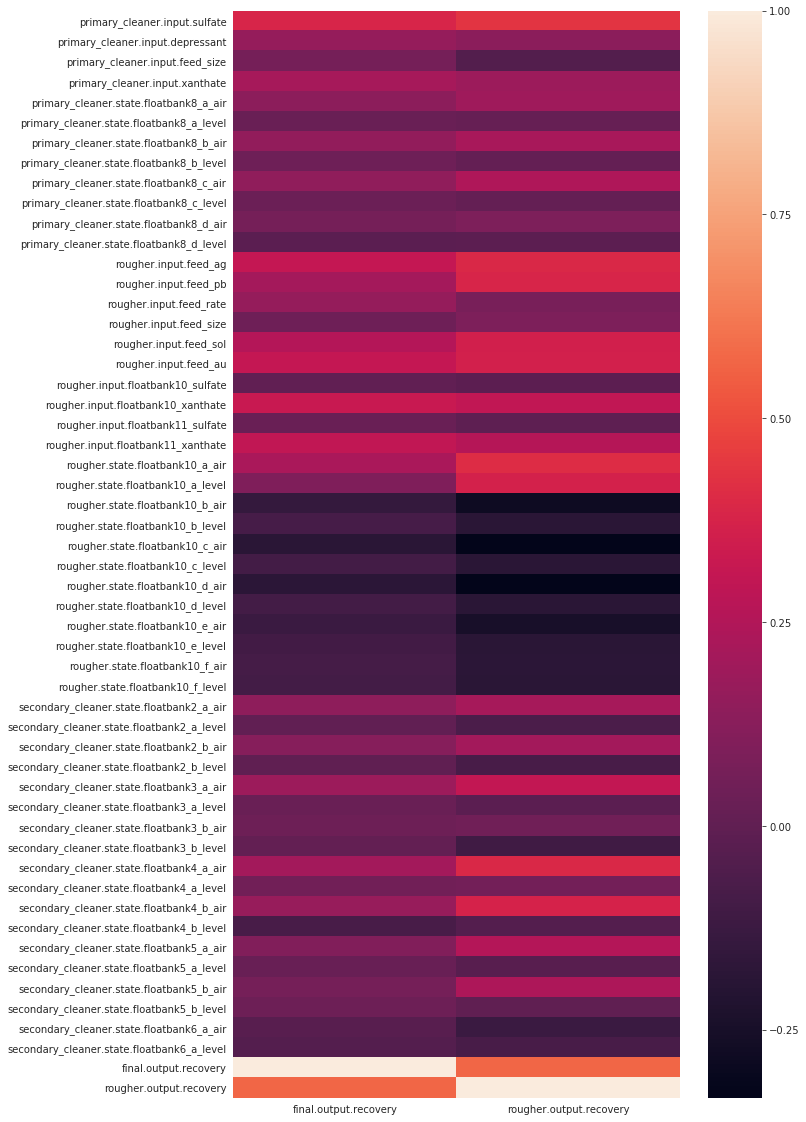

In [42]:
plt.figure(figsize = (10,20))
sns.heatmap(correlation)
plt.show()

Исключим из рассмотрения показатели, которые практически не оказывают влияния на эффективность (коэффициент корреляции менее 0,2):

In [43]:
to_drop = correlation.loc[(abs(correlation['final.output.recovery']) < 0.2) & 
                          (abs(correlation['rougher.output.recovery']) < 0.2)]
to_drop

,final.output.recovery,rougher.output.recovery
primary_cleaner.input.depressant,0.162384,0.134622
primary_cleaner.input.feed_size,0.064027,-0.043961
primary_cleaner.state.floatbank8_a_air,0.138668,0.197603
primary_cleaner.state.floatbank8_a_level,0.030313,0.016695
primary_cleaner.state.floatbank8_b_level,0.044201,0.011276
primary_cleaner.state.floatbank8_c_level,0.031443,0.015591
primary_cleaner.state.floatbank8_d_air,0.062508,0.088979
primary_cleaner.state.floatbank8_d_level,-0.020000,-0.011592
rougher.input.feed_rate,0.162545,0.077214
rougher.input.feed_size,0.046446,0.090069


In [44]:
train_data = train_data.drop(list(to_drop.index), axis = 1)
test_data = test_data.drop(list(to_drop.index), axis = 1)
print(train_data.shape)
print(test_data.shape)

(13852, 25)
(5193, 25)


### Вывод

В рамках анализа данных:
- исследована концентрация металлов на каждой стадии технологического процесса. Вяснено, что концентрация золота и свинца растёт от стадии к стадии, тогда как концентрация серебра снижается после этапа обогащения. 
- проведено сравнение распределений гранул сырья
- исследована суммарная концентрация всех веществ на каждой стадии, из обучающего и тестового наборов исключены аномальные нулевые значения
- проведён анализ корреляции между переменными, исключены переменные, оказывающие слабое влияние на эффективность обогащения. 

## Построение модели

### Функция для вычисления итоговой sMAPE:

In [45]:
def smape(target, predictions):
    for_smape = abs(target - predictions) / ((abs(target) + abs(predictions)) * 0.5) * 100
    smape_total = for_smape['rougher.output.recovery'].mean()*0.25 + for_smape['final.output.recovery'].mean()*0.75
    return(round(smape_total, 2))

Выделим целевые и обучающие переменные для моделей в обучающей и тестовой выборках:

In [46]:
# для обучающей выборки
train_target = train_data[['rougher.output.recovery', 'final.output.recovery']]
train_features = train_data.drop(['rougher.output.recovery', 'final.output.recovery'], axis = 1)
print('Размер целевых переменных в обучающей выборке:', train_target.shape)
print('Размер влияющих переменных в обучающей выборке:', train_features.shape)

Размер целевых переменных в обучающей выборке: (13852, 2)
Размер влияющих переменных в обучающей выборке: (13852, 23)


In [47]:
# для тестовой выборки
test_target = test_data[['rougher.output.recovery', 'final.output.recovery']]
test_features = test_data.drop(['rougher.output.recovery', 'final.output.recovery'], axis = 1)
print('Размер целевых переменных в тестовой выборке:', test_target.shape)
print('Размер влияющих переменных в тестовой выборке:', test_features.shape)

Размер целевых переменных в тестовой выборке: (5193, 2)
Размер влияющих переменных в тестовой выборке: (5193, 23)


### Обучение и выбор лучшей модели

Перед нами стоит задача регрессии, поскольку целевые признаки относятся к непрерывным величинам. В качестве моделей будем использовать линейную регрессию, дерево решений и случайный лес. В качестве метрики для оценки качества будет использоваться sMAPE, будет выбрана модель с минимальным значением sMAPE.

Начнём с модели **линейной регрессии**:

In [48]:
linear = LinearRegression()
linear.fit(train_features, train_target)
predictions = linear.predict(train_features)
print('sMAPE для модели линейной регрессии:', smape(train_target, predictions))

sMAPE для модели линейной регрессии: 8.25


Кросс-валидация с метрикой sMAPE:

In [49]:
# сохраним метрику sMAPE в отдельную переменную
smape_score = make_scorer(smape, greater_is_better = False)

scores = cross_val_score(linear, train_features, train_target, scoring = smape_score, cv = 5)
print('Средняя оценка sMAPE модели линейной регрессии:', round(-scores.mean(), 2))

Средняя оценка sMAPE модели линейной регрессии: 9.6


Модель **дерева решений**:

In [50]:
tree = DecisionTreeRegressor(random_state = 1)
parametres = {'max_depth': range (1,20)}
grid_tree = GridSearchCV(tree, parametres, scoring = smape_score, cv=5)
grid_tree.fit(train_features, train_target)
print('Параметры лучшего дерева решений', grid_tree.best_params_)
print('Лучшая модель дерева решений показала sMAPE', round(-grid_tree.best_score_, 2))

Параметры лучшего дерева решений {'max_depth': 4}
Лучшая модель дерева решений показала sMAPE 9.47


Модель **случайного леса**:

In [51]:
forest = RandomForestRegressor(random_state = 1)
params = {'max_depth': range (1, 5),
             'n_estimators': range (10, 100, 10)}
random_forest = RandomizedSearchCV(forest, params, random_state=1, 
                                   scoring = smape_score, cv = 5)
random_forest.fit(train_features, train_target)
print('Параметры лучшего случайного леса', random_forest.best_params_)
print('Лучшая модель случайного леса показала sMAPE', round(-random_forest.best_score_, 2))

Параметры лучшего случайного леса {'n_estimators': 80, 'max_depth': 4}
Лучшая модель случайного леса показала sMAPE 9.36


Вычислим sMAPE для константной модели:

In [52]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(train_features, train_target)
dummy_predictions = dummy_regr.predict(train_features)
dummy_smape = smape(train_target, dummy_predictions)
print('Константная модель показывает sMAPE', dummy_smape)

Константная модель показывает sMAPE 10.13


Итак, метрики моделей по возрастанию качества:
- константная модель 10.13
- линейная регрессия 9.6
- дерево решений 9.47
- случайный лес 9.36

Все построенные показывают метрику sMAPE ниже, чем константная модель (однако ненамного). Лучшие результаты показывает модель случайного леса с количеством деревьев 80, макисмальной глубиной 4.
___

### Проверка на тестовой выборке

In [53]:
best_model = RandomForestRegressor(random_state = 1, max_depth = random_forest.best_params_['max_depth'], 
                                  n_estimators = random_forest.best_params_['n_estimators'])
best_model.fit(test_features, test_target)
test_predictions = best_model.predict(test_features)
print('sMAPE лучшей модели на тестовой выборке:', smape(test_target, test_predictions))

sMAPE лучшей модели на тестовой выборке: 6.83


In [54]:
dummy_regr.fit(test_features, test_target)
dummy_predictions = dummy_regr.predict(test_features)
dummy_smape = smape(test_target, dummy_predictions)
print('Константная модель показывает sMAPE', dummy_smape)

Константная модель показывает sMAPE 8.06


Как видно, на тестовой выборке модель достигла показателя sMAPE меньше, чем на обучающей.

## Выводы

Нашей задачей была подготовка прототипа модели машинного обучения для предсказания коэффициента восстановления золота из золотосодержащей руды в черновом и финальном концентратах.

В рамках проекта обучено и оценено 3 регрессионные модели:
- линейная регрессия
- дерево решений
- случайный лес

Все 3 модели проверены на адекватность и могут быть использованы для прогнозирования. 

Для прогнозирования эффективности  восстановления золота компании рекомендуется пользоваться **моделью случайного леса с 80 деревьями и максимальной глубиной 4**: на обучающей выборке sMAPE модели равна 9.36, на тестовой - 6.83.